<a href="https://colab.research.google.com/github/malteborgmann/ITU-Natural-Language-Processing/blob/main/HW1_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YZV 405E HW1: Processing Raw Text

The most important source of texts is undoubtedly the Web. It's convenient to have existing text collections to explore, such as a corpora. However, you probably have your own text sources in mind, and need to learn how to access them.

The goal of this homework is to teach how to:

*   Write programs to access text from the web, in order to get hold of an unlimited range of language material.
*   Split documents up into individual words and punctuation symbols, so we can carry out an analysis.
*   Write programs to produce a formatted output.

In order to address these, we will be covering key concepts in NLP, including tokenization and stemming. Along the way you will consolidate your Python knowledge and learn about regular expressions. Since so much text on the web is in HTML format, we will also see how to dispense with markup.













**To be able to run the codes below, download nltk.**

In [83]:
import nltk
nltk.download('book')
nltk.download('nps_chat')
nltk.download('words')
nltk.download('punkt_tab')

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package dependency_treebank is already up-to-date!
[nltk_data]    | Downloadi

True

In [84]:
from nltk.book import *

In [85]:
import re, pprint
from nltk import word_tokenize

## 1. Accessing Text from the Web

### Electronic Books

A small sample of texts from Project Gutenberg appears in the NLTK corpus collection. However, you may be interested in analyzing other texts from Project Gutenberg. You can browse the catalog of 25,000 free online books at http://www.gutenberg.org/catalog/, and obtain a URL to an ASCII text file.

Text number 2554 is an English translation of Crime and Punishment, and we can access it as follows.

In [86]:
from urllib import request
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')
print("Type:", type(raw))
print("Length of raw:", len(raw))
print(raw[:75])

Type: <class 'str'>
Length of raw: 1135214
*** START OF THE PROJECT GUTENBERG EBOOK 2554 ***




CRIME AND PUNISHMENT



The variable raw contains a string with 1,135,214 characters. This is the raw content of the book, including many details we are not interested in such as whitespace, line breaks and blank lines.  For our language processing, we want to break up the string into words and punctuation. This step is called **tokenization**, and it produces our familiar structure, a list of words and punctuation.

In [87]:
tokens = word_tokenize(raw)
print("Type:", type(tokens))
print("Length of raw:", len(tokens))
print(tokens[:22])

Type: <class 'list'>
Length of raw: 253688
['*', '*', '*', 'START', 'OF', 'THE', 'PROJECT', 'GUTENBERG', 'EBOOK', '2554', '*', '*', '*', 'CRIME', 'AND', 'PUNISHMENT', 'By', 'Fyodor', 'Dostoevsky', 'Translated', 'By', 'Constance']


 If we now take the further step of creating an NLTK text from this list, we can carry out all of the other linguistic processing we saw, along with the regular list operations like slicing:

In [88]:
text = nltk.Text(tokens)
print("Type:", type(text))
print(text[1024:1038])
print("Collocations:")
text.collocations()

Type: <class 'nltk.text.Text'>
['kitchen', ',', 'the', 'door', 'of', 'which', 'invariably', 'stood', 'open', '.', 'And', 'each', 'time', 'he']
Collocations:
Katerina Ivanovna; Pyotr Petrovitch; Pulcheria Alexandrovna; Avdotya
Romanovna; Rodion Romanovitch; Marfa Petrovna; Sofya Semyonovna; old
woman; Porfiry Petrovitch; Amalia Ivanovna; great deal; young man;
Nikodim Fomitch; Ilya Petrovitch; Andrey Semyonovitch; Hay Market;
Dmitri Prokofitch; Good heavens; police station; head clerk


### Dealing with HTML

Much of the text on the web is in the form of HTML documents. You can use a web browser to save a page as text to a local file, then access this as described in the section on files below. However, if you're going to do this often, it's easiest to get Python to do the work directly.

In [89]:
url = "http://nlp.itu.edu.tr"
html = request.urlopen(url).read().decode('utf8')
html[:60]
#type print(html) to see the whole html with tags etc.
print(html)





<html lang="en">
<head><meta charset="utf-8" /><meta http-equiv="X-UA-Compatible" content="IE=edge" /><meta name="viewport" content="width=device-width, initial-scale=1" /><title>
	İT&#220; Doğal Dil İşleme Araştırma Grubu
</title><link rel="stylesheet" type="text/css" media="screen" href="/Sitefinity/WebsiteTemplates/GenelTemplate/App_Themes/ITUGenelTemplate/slick/slick.css" /><link rel="stylesheet" type="text/css" media="screen" href="/Sitefinity/WebsiteTemplates/GenelTemplate/App_Themes/ITUGenelTemplate/slick/slick-theme.css" /><link rel="stylesheet" type="text/css" media="screen" href="/Sitefinity/WebsiteTemplates/GenelTemplate/App_Themes/ITUGenelTemplate/slick/slick_style.css" /><link rel="shortcut icon" href="/Sitefinity/WebsiteTemplates/GenelTemplate/App_Themes/ITUGenelTemplate/Images/favicon.ico" />
     <style type="text/css">
        
    </style>

    <meta name="Generator" content="Sitefinity 7.3.5619.0 PU" /><link rel="canonical" href="http://nlp.itu.edu.tr" /><meta nam

To get text out of HTML we will use a Python library called BeautifulSoup, available from  http://www.crummy.com/software/BeautifulSoup/:



In [90]:
from bs4 import BeautifulSoup
raw = BeautifulSoup(html, 'html.parser').get_text()
tokens = word_tokenize(raw)
tokens[:10]

['İTÜ',
 'Doğal',
 'Dil',
 'İşleme',
 'Araştırma',
 'Grubu',
 'English',
 'İTÜ',
 'ANASAYFA',
 'NİNOVA']

This still contains unwanted material concerning site navigation and related stories. With some trial and error you can find the start and end indexes of the content and select the tokens of interest, and initialize a text as before.

In [91]:
tokens = tokens[110:390]
text = nltk.Text(tokens)
text.concordance('İTÜ')

Displaying 5 of 5 matches:
    verildi . ( ? ) 21 Kas 2024 ( ? ) İTÜ Rektörü Prof.Dr . Hasan Mandal'dan Zi
f.Dr . Hasan Mandal'dan Ziyaret ( ? ) İTÜ Rektörü Prof.Dr . Hasan Mandal Araştı
) 23 Eyl 2024 ( ? ) Türk Dil Kurumu - İTÜ Doğal Dil İşleme Çalıştayı ( ? ) ( ? 
 işleme tanımı altında toplanmıştır . İTÜ Doğal Dil İşleme ( ddi @ İTÜ ) araştı
mıştır . İTÜ Doğal Dil İşleme ( ddi @ İTÜ ) araştırma grubu ,


### Processing RSS Feeds
The blogosphere is an important source of text, in both formal and informal registers. With the help of a Python library called the Universal Feed Parser, available from https://pypi.python.org/pypi/feedparser, we can access the content of a blog, as shown below:



In [92]:
!pip install feedparser #command to install feedparser

In [93]:
import feedparser
llog = feedparser.parse("http://languagelog.ldc.upenn.edu/nll/?feed=atom")
print("Entry count:", len(llog.entries))
post = llog.entries[2]
print("Title:", post.title)
content = post.content[0].value
print(content[:70]) #printing a sample of the post
#turning content into text
raw = BeautifulSoup(content, 'html.parser').get_text()
tokens = word_tokenize(raw) #tokenizing the raw text
tokens[:10]

Entry count: 13
Title: The noninfallibility yet utility of AIO
<p>Someone complained in an inappropriate and non sequiturish place th


['Someone',
 'complained',
 'in',
 'an',
 'inappropriate',
 'and',
 'non',
 'sequiturish',
 'place',
 'that']

### The NLP Pipeline

![](http://www.nltk.org/images/pipeline1.png)

The figure above summarizes what we have covered in this section, including the process of building a vocabulary.

When we load the contents of a URL or file, and when we strip out HTML markup, we are dealing with strings, Python's `<str>` data type.

When we tokenize a string we produce a list (of words), and this is Python's `<list>` type. Normalizing and sorting lists produces other lists.

## 2. Text Processing with Unicode

Our programs will often need to deal with different languages, and different character sets. The concept of "plain text" is a fiction. If you live in the English-speaking world you probably use ASCII, possibly without realizing it. Some European languages use one of the extended Latin character sets, containing such characters as "ø" for Danish and Norwegian, "ő" for Hungarian, "ñ" for Spanish and Breton, and "ň" for Czech and Slovak. In this section, we will give an overview of how to use Unicode for processing texts that use non-ASCII character sets.

### Unicode

Unicode supports over a million characters. Each character is assigned a number, called a **code point**. In Python, code points are written in the form `\uXXXX`, where XXXX is the number in 4-digit hexadecimal form.

Within a program, we can manipulate Unicode strings just like normal strings. However, when Unicode characters are stored in files or displayed on a terminal, they must be encoded as a stream of bytes. Some encodings (such as ASCII and Latin-2) use a single byte per code point, so they can only support a small subset of Unicode, enough for a single language. Other encodings (such as UTF-8) use multiple bytes and can represent the full range of Unicode characters.

Text in files will be in a particular encoding, so we need some mechanism for translating it into Unicode — translation into Unicode is called **decoding**. Conversely, to write out Unicode to a file or a terminal, we first need to translate it into a suitable encoding — this translation out of Unicode is called **encoding**, and is illustrated in the figure below.

![](https://www.nltk.org/images/unicode.png)

### Extracting encoded text from files

Suppose we've got a tiny text file and understand how it's encoded. For example, as the name suggests, polish-lat2.txt is a snippet of the Polish Wikipedia text (see [http:/pl.wikipedia.org/wiki/Biblioteka_Pruska](http:/pl.wikipedia.org/wiki/Biblioteka_Pruska)). This file is encoded as the *ISO-8859-2 Latin-2* file. The function `nltk.data.find()` locates the file for us.

In [94]:
nltk.download('unicode_samples')
path = nltk.data.find('corpora/unicode_samples/polish-lat2.txt')

[nltk_data] Downloading package unicode_samples to /root/nltk_data...
[nltk_data]   Package unicode_samples is already up-to-date!


The Python `open()` function can read encoded data into Unicode strings, and write out Unicode strings in encoded form. It takes a parameter to specify the encoding of the file being read or written. So let's open our Polish file with the encoding 'latin2' and inspect the contents of the file:

In [95]:
f = open(path, encoding='latin2')
for line in f:
  line = line.strip()
  print(line)

Pruska Biblioteka Państwowa. Jej dawne zbiory znane pod nazwą
"Berlinka" to skarb kultury i sztuki niemieckiej. Przewiezione przez
Niemców pod koniec II wojny światowej na Dolny Śląsk, zostały
odnalezione po 1945 r. na terytorium Polski. Trafiły do Biblioteki
Jagiellońskiej w Krakowie, obejmują ponad 500 tys. zabytkowych
archiwaliów, m.in. manuskrypty Goethego, Mozarta, Beethovena, Bacha.


If this does not display correctly on your terminal, or if we want to see the underlying numerical values (or "codepoints") of the characters, then we can convert all non-ASCII characters into their two-digit \xXX and four-digit \uXXXX representations:

In [96]:
f = open(path, encoding='latin2')
for line in f:
  line = line.strip()
  print(line.encode('unicode_escape'))

b'Pruska Biblioteka Pa\\u0144stwowa. Jej dawne zbiory znane pod nazw\\u0105'
b'"Berlinka" to skarb kultury i sztuki niemieckiej. Przewiezione przez'
b'Niemc\\xf3w pod koniec II wojny \\u015bwiatowej na Dolny \\u015al\\u0105sk, zosta\\u0142y'
b'odnalezione po 1945 r. na terytorium Polski. Trafi\\u0142y do Biblioteki'
b'Jagiello\\u0144skiej w Krakowie, obejmuj\\u0105 ponad 500 tys. zabytkowych'
b'archiwali\\xf3w, m.in. manuskrypty Goethego, Mozarta, Beethovena, Bacha.'


The first line above illustrates a Unicode escape string preceded by the \u escape string, namely \u0144 . The relevant Unicode character will be dislayed on the screen as the glyph ń. In the third line of the preceding example, we see \xf3, which corresponds to the glyph ó, and is within the 128-255 range.

In Python 3, source code is encoded by default using UTF-8, and if you use IDLE or another program editor that supports Unicode, you can include Unicode characters in strings. Use the `\uXXXX` escape sequence to include arbitrary Unicode characters. We find the integer ordinal of a character using ord). For instance,

In [97]:
ord('ń')

324

The hexadecimal 4 digit notation for 324 is 0144 (type `hex(324)` to discover this), and we can define a string with the appropriate escape sequence.

In [98]:
nacute = '\u0144'
nacute

'ń'

The module `unicodedata` lets us inspect the properties of Unicode characters. In the following example, we select all characters in the third line of our Polish text outside the ASCII range and print their UTF-8 byte sequence, followed by their code point integer using the standard Unicode convention (i.e., prefixing the hex digits with U+), followed by their Unicode name.

In [99]:
import unicodedata
lines = open(path, encoding='latin2').readlines()
line = lines[2]
print(line.encode('unicode_escape'))
for c in line: [1]
if ord(c) > 127:
         print('{} U+{:04x} {}'.format(c.encode('utf8'), ord(c),
                                       unicodedata.name(c)))

b'Niemc\\xf3w pod koniec II wojny \\u015bwiatowej na Dolny \\u015al\\u0105sk, zosta\\u0142y\\n'


In [100]:
for c in line:
    if ord(c) > 127:
        print('{} U+{:04x} {}'.format(c, ord(c), unicodedata.name(c)))

ó U+00f3 LATIN SMALL LETTER O WITH ACUTE
ś U+015b LATIN SMALL LETTER S WITH ACUTE
Ś U+015a LATIN CAPITAL LETTER S WITH ACUTE
ą U+0105 LATIN SMALL LETTER A WITH OGONEK
ł U+0142 LATIN SMALL LETTER L WITH STROKE


NLTK tokenizers allow Unicode strings as input, and correspondingly yield Unicode strings as output.

In [101]:
word_tokenize(line)

['Niemców',
 'pod',
 'koniec',
 'II',
 'wojny',
 'światowej',
 'na',
 'Dolny',
 'Śląsk',
 ',',
 'zostały']

## 3. Regular Expressions for Detecting Word Patterns

Many linguistic processing tasks involve pattern matching. For example, we can find words ending with ed using `endswith('ed')`. However, regular expressions give us a more powerful and flexible method for describing the character patterns we are interested in.

In [102]:
# Preprocess the corpus to remove any proper names
wordlist = [w for w in nltk.corpus.words.words('en') if w.islower()]

### Using Basic Meta-Characters

Let's find words ending with ed using the regular expression `«ed$»`. We will use the `re.search(p, s)` function to check whether the pattern p can be found somewhere inside the string s. We need to specify the characters of interest, and use the dollar sign which has a special behavior in the context of regular expressions in that it matches the end of the word:

In [103]:
print(", ".join([w for w in wordlist if re.search('ed$', w)]))

abaissed, abandoned, abased, abashed, abatised, abed, aborted, abridged, abscessed, absconded, absorbed, abstracted, abstricted, accelerated, accepted, accidented, accoladed, accolated, accomplished, accosted, accredited, accursed, accused, accustomed, acetated, acheweed, aciculated, aciliated, acknowledged, acorned, acquainted, acquired, acquisited, acred, aculeated, addebted, added, addicted, addlebrained, addleheaded, addlepated, addorsed, adempted, adfected, adjoined, admired, admitted, adnexed, adopted, adossed, adreamed, adscripted, aduncated, advanced, advised, aeried, aethered, afeared, affected, affectioned, affined, afflicted, affricated, affrighted, affronted, aforenamed, afterfeed, aftershafted, afterthoughted, afterwitted, agazed, aged, agglomerated, aggrieved, agminated, agnamed, agonied, agreed, agueweed, ahungered, aiguilletted, ailweed, airbrained, airified, aiseweed, aisled, alarmed, alated, alimonied, aliped, alleyed, allied, alligatored, allseed, almsdeed, aloed, al

The **'.' (wildcard symbol)** matches any single character. Suppose we have room in a crossword puzzle for an 8-letter word with j as its third letter and t as its sixth letter. In place of each blank cell we use a period:

In [104]:
[w for w in wordlist if re.search('^..j..t..$', w)]

['abjectly',
 'adjuster',
 'dejected',
 'dejectly',
 'injector',
 'majestic',
 'objectee',
 'objector',
 'rejecter',
 'rejector',
 'unjilted',
 'unjolted',
 'unjustly']

**Practise**

**Your Turn:** The caret symbol ^ matches the start of a string, just like the $ matches the end. What results do we get with the above example if we leave out both of these, and search for «..j..t..»?

In [105]:
# Try here
[w for w in wordlist if re.search('..j..t..', w)]

['abjectedness',
 'abjection',
 'abjective',
 'abjectly',
 'abjectness',
 'adjection',
 'adjectional',
 'adjectival',
 'adjectivally',
 'adjective',
 'adjectively',
 'adjectivism',
 'adjectivitis',
 'adjustable',
 'adjustably',
 'adjustage',
 'adjustation',
 'adjuster',
 'adjustive',
 'adjustment',
 'antejentacular',
 'antiprojectivity',
 'bijouterie',
 'coadjustment',
 'cojusticiar',
 'conjective',
 'conjecturable',
 'conjecturably',
 'conjectural',
 'conjecturalist',
 'conjecturality',
 'conjecturally',
 'conjecture',
 'conjecturer',
 'coprojector',
 'counterobjection',
 'dejected',
 'dejectedly',
 'dejectedness',
 'dejectile',
 'dejection',
 'dejectly',
 'dejectory',
 'dejecture',
 'disjection',
 'guanajuatite',
 'inadjustability',
 'inadjustable',
 'injectable',
 'injection',
 'injector',
 'injustice',
 'insubjection',
 'interjection',
 'interjectional',
 'interjectionalize',
 'interjectionally',
 'interjectionary',
 'interjectionize',
 'interjectiveness',
 'interjector',
 'interje

### Ranges and Closures

![](https://www.nltk.org/images/T9.png)

The T9 system is used for entering text on mobile phones. Two or more words that are entered with the same sequence of keystrokes are known as textonyms. For example, both hole and golf are entered by pressing the sequence 4653. What other words could be produced with the same sequence? Here we use the regular expression `«^[ghi][mno][jlk][def]$»`:

In [106]:
[w for w in wordlist if re.search('^[ghi][mno][jlk][def]$', w)]

['gold', 'golf', 'hold', 'hole']

The first part of the expression, `«^[ghi]»`, matches the start of a word followed by g, h, or i. The next part of the expression, `«[mno]»`, constrains the second character to be m, n, or o. The third and fourth characters are also constrained. Only four words satisfy all these constraints. Note that the order of characters inside the square brackets is not significant, so we could have written `«^[hig][nom][ljk][fed]$»` and matched the same words.

**Practise**

**Your Turn:** Look for some "finger-twisters", by searching for words that only use part of the number-pad. For example `«^[ghijklmno]+$»`, or more concisely, `«^[g-o]+$»`, will match words that only use keys 4, 5, 6 in the center row, and `«^[a-fj-o]+$»` will match words that use keys 2, 3, 5, 6 in the top-right corner. What do - and + mean?

In [107]:
# Try here
# [w for w in wordlist if re.search('^[ghijklmno]+$', w)]

[w for w in wordlist if re.search('^[g-o]+$', w)]


print("-----------------------")
[w for w in wordlist if re.search('^[a-fj-o]+$', w)]

# +	means that there is one or more occurrences of that character
# - represents the character range. E.g g-o includes all charactes in the alpahabet between g and o while g as well as o are included


-----------------------


['a',
 'aa',
 'aal',
 'aam',
 'aba',
 'abac',
 'abaca',
 'aback',
 'abaff',
 'abalone',
 'abandon',
 'abandonable',
 'abandoned',
 'abandonee',
 'abb',
 'abdal',
 'abdomen',
 'abeam',
 'abed',
 'abele',
 'able',
 'abloom',
 'abode',
 'abolla',
 'aboma',
 'aboon',
 'academe',
 'acana',
 'acca',
 'accede',
 'accedence',
 'accend',
 'accolade',
 'accoladed',
 'accolle',
 'accommodable',
 'ace',
 'ackman',
 'acle',
 'acme',
 'acne',
 'acnodal',
 'acnode',
 'acock',
 'acold',
 'acoma',
 'acone',
 'ad',
 'adad',
 'adance',
 'add',
 'adda',
 'addable',
 'added',
 'addend',
 'addenda',
 'addle',
 'ade',
 'adead',
 'adeem',
 'adenocele',
 'adenoma',
 'adman',
 'ado',
 'adobe',
 'ae',
 'aefald',
 'aenean',
 'aeon',
 'aface',
 'affa',
 'affable',
 'aflame',
 'afoam',
 'ajaja',
 'ak',
 'aka',
 'akala',
 'ake',
 'akeake',
 'akee',
 'aknee',
 'ako',
 'al',
 'ala',
 'alack',
 'alada',
 'alala',
 'alameda',
 'alamo',
 'alan',
 'aland',
 'alb',
 'alba',
 'alban',
 'albe',
 'albedo',
 'albee',
 'alcalde

**Your Turn:** Look for some "finger-twisters", by searching for words that only use part of the number-pad. For example `«^[ghijklmno]+$»`, or more concisely, `«^[g-o]+$»`, will match words that only use keys 4, 5, 6 in the center row, and `«^[a-fj-o]+$»` will match words that use keys 2, 3, 5, 6 in the top-right corner. What do - and + mean?

Let's explore the `+` symbol a bit further. Notice that it can be applied to individual letters, or to bracketed sets of letters:

In [108]:
chat_words = sorted(set(w for w in nltk.corpus.nps_chat.words()))
# ^ matches any character other than a vowel
[w for w in chat_words if re.search('^m+i+n+e+$', w)]

['miiiiiiiiiiiiinnnnnnnnnnneeeeeeeeee',
 'miiiiiinnnnnnnnnneeeeeeee',
 'mine',
 'mmmmmmmmiiiiiiiiinnnnnnnnneeeeeeee']

In [109]:
[w for w in chat_words if re.search('^[ha]+$', w)]

['a',
 'aaaaaaaaaaaaaaaaa',
 'aaahhhh',
 'ah',
 'ahah',
 'ahahah',
 'ahh',
 'ahhahahaha',
 'ahhh',
 'ahhhh',
 'ahhhhhh',
 'ahhhhhhhhhhhhhh',
 'h',
 'ha',
 'haaa',
 'hah',
 'haha',
 'hahaaa',
 'hahah',
 'hahaha',
 'hahahaa',
 'hahahah',
 'hahahaha',
 'hahahahaaa',
 'hahahahahaha',
 'hahahahahahaha',
 'hahahahahahahahahahahahahahahaha',
 'hahahhahah',
 'hahhahahaha']

It should be clear that `+` simply means "one or more instances of the preceding item", which could be an individual character like m, a set like `[fed]` or a range like `[d-f]`. Now let's replace `+` with `*`, which means "zero or more instances of the preceding item". The regular expression `«^m*i*n*e*$»` will match everything that we found using `«^m+i+n+e+$»`, but also words where some of the letters don't appear at all, e.g. me, min, and mmmmm. Note that the `+` and `*` symbols are sometimes referred to as **Kleene closures**, or simply **closures**.

### Regular Expression Meta-Characters, Including Wildcards, Ranges and Closures

|  Operator  |                                    Behavior                                   |   |   |   |
|:----------:|:-----------------------------------------------------------------------------:|---|---|---|
| .          | Wildcard, matches any character                                               |   |   |   |
| ^abc       | Matches some pattern abc at the start of a string                             |   |   |   |
| abc$       | Matches some pattern abc at the end of a string                               |   |   |   |
| [abc]      | Matches one of a set of characters                                            |   |   |   |
| [A-Z0-9]   | Matches one of a range of characters                                          |   |   |   |
| ed\|ing\|s | Matches one of the specified strings (disjunction)                            |   |   |   |
| *          | Zero or more of previous item, e.g. a*, [a-z]* (also known as Kleene Closure) |   |   |   |
| +          | One or more of previous item, e.g. a+, [a-z]+                                 |   |   |   |
| ?          | Zero or one of the previous item (i.e. optional), e.g. a?, [a-z]?             |   |   |   |
| {n}        | Exactly n repeats where n is a non-negative integer                           |   |   |   |
| {n,}       | At least n repeats                                                            |   |   |   |
| {,n}       | No more than n repeats                                                        |   |   |   |
| {m,n}      | At least m and no more than n repeats                                         |   |   |   |
| a(b\|c)+   | Parentheses that indicate the scope of the operators                          |   |   |   |

## 4. Useful Applications of Regular Expressions

The above examples all involved searching for words w that match some regular expression regexp using `re.search(regexp, w)`. Apart from checking if a regular expression matches a word, we can use regular expressions to extract material from words, or to modify words in specific ways.

### Extracting Word Pieces

The `re.findall()` method finds all (non-overlapping) matches of the given regular expression.

In [110]:
word = 'supercalifragilisticexpialidocious'
re.findall(r'[aeiou]', word)

['u',
 'e',
 'a',
 'i',
 'a',
 'i',
 'i',
 'i',
 'e',
 'i',
 'a',
 'i',
 'o',
 'i',
 'o',
 'u']

Let's look for all sequences of two or more vowels in some text, and determine their relative frequency:

In [111]:
wsj = sorted(set(nltk.corpus.treebank.words()))
# We write {2,} for finding two vowels in findall function's first argument
# You can change it to something else such as {3,}
fd = nltk.FreqDist(vs for word in wsj for vs
                   in re.findall(r'[aeiou]{2,}', word))
fd.most_common(12)

[('io', 549),
 ('ea', 476),
 ('ie', 331),
 ('ou', 329),
 ('ai', 261),
 ('ia', 253),
 ('ee', 217),
 ('oo', 174),
 ('ua', 109),
 ('au', 106),
 ('ue', 105),
 ('ui', 95)]

### Doing More with Word Pieces

We can use `re.findall()` to extract material from words, now we can glue them together or plot these pieces.

It is sometimes noted that English text is highly redundant, and it is still easy to read when word-internal vowels are left out. For example, declaration becomes dclrtn, and inalienable becomes inlnble, retaining any initial or final vowel sequences. The regular expression in our next example matches initial vowel sequences, final vowel sequences, and all consonants; everything else is ignored. This three-way disjunction is processed left-to-right, if one of the three parts matches the word, any later parts of the regular expression are ignored. We use `re.findall()` to extract all the matching pieces, and `''.join()` to join them together.

In [112]:
'''re.findall() to extract all the matching pieces,
and ''.join() to join them together.'''

regexp = r'^[AEIOUaeiou]+|[AEIOUaeiou]+$|[^AEIOUaeiou]'

def compress(word):
  pieces = re.findall(regexp, word)
  return ''.join(pieces)

english_udhr = nltk.corpus.udhr.words('English-Latin1')
print(nltk.tokenwrap(compress(w) for w in english_udhr[:75]))

# .tokenwrap: print a list of text tokens, breaking lines on whitespace.

Unvrsl Dclrtn of Hmn Rghts Prmble Whrs rcgntn of the inhrnt dgnty and
of the eql and inlnble rghts of all mmbrs of the hmn fmly is the fndtn
of frdm , jstce and pce in the wrld , Whrs dsrgrd and cntmpt fr hmn
rghts hve rsltd in brbrs acts whch hve outrgd the cnscnce of mnknd ,
and the advnt of a wrld in whch hmn bngs shll enjy frdm of spch and


Next, let's combine regular expressions with conditional frequency distributions. Here we will extract all consonant-vowel sequences from the words of Rotokas, such as *ka* and *si*. Since each of these is a pair, it can be used to initialize a conditional frequency distribution. We then tabulate the frequency of each pair:

In [113]:
rotokas_words = nltk.corpus.toolbox.words('rotokas.dic')
cvs = [cv for w in rotokas_words for cv in re.findall(r'[ptksvr][aeiou]', w)]
cfd = nltk.ConditionalFreqDist(cvs)
cfd.tabulate()

    a   e   i   o   u 
k 418 148  94 420 173 
p  83  31 105  34  51 
r 187  63  84  89  79 
s   0   0 100   2   1 
t  47   8   0 148  37 
v  93  27 105  48  49 


The example below processes each word w in turn, and for each one,  finds every substring that matches the regular expression `«[ptksvr][aeiou]»`.  In the case of the word *kasuari*, it finds *ka*, *su* and *ri*. Therefore, the `cv_word_pairs` list will contain `('ka', 'kasuari')`, `('su', 'kasuari')` and `('ri', 'kasuari')`. One further step, using `nltk.Index()`, converts this into a useful index.

In [114]:
# inspect the words behind the numbers in the above table using Index function.

cv_word_pairs = [(cv, w) for w in rotokas_words
                 for cv in re.findall(r'[ptksvr][aeiou]', w)]
cv_index = nltk.Index(cv_word_pairs)

print('Words containing su: ', cv_index['su'])

print('Words containing po: ', cv_index['po'])

Words containing su:  ['kasuari']
Words containing po:  ['kaapo', 'kaapopato', 'kaipori', 'kaiporipie', 'kaiporivira', 'kapo', 'kapoa', 'kapokao', 'kapokapo', 'kapokapo', 'kapokapoa', 'kapokapoa', 'kapokapora', 'kapokapora', 'kapokaporo', 'kapokaporo', 'kapokari', 'kapokarito', 'kapokoa', 'kapoo', 'kapooto', 'kapoovira', 'kapopaa', 'kaporo', 'kaporo', 'kaporopa', 'kaporoto', 'kapoto', 'karokaropo', 'karopo', 'kepo', 'kepoi', 'keposi', 'kepoto']


### Finding Word Stems

When we use a web search engine, we usually don't mind (or even notice) if the words in the document differ from our search terms in having different endings. A query for laptops finds documents containing laptop and vice versa. Indeed, laptop and laptops are just two forms of the same dictionary word (or lemma). For some language processing tasks we want to ignore word endings, and just deal with word stems.

There are various ways we can pull out the stem of a word. Here's a simple-minded approach which just strips off anything that looks like a suffix:

In [115]:
def stem(word):
    for suffix in ['ing', 'ly', 'ed', 'ious', 'ies', 'ive', 'es', 's', 'ment']:
        if word.endswith(suffix):
            return word[:-len(suffix)]
    return word

Although we will ultimately use NLTK's built-in stemmers, it's interesting to see how we can use regular expressions for this task. Our first step is to build up a disjunction of all the suffixes. We need to enclose it in parentheses in order to limit the scope of the disjunction.

In [116]:
re.findall(r'^.*(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

['ing']

Here, `re.findall()` just gave us the suffix even though the regular expression matched the entire word. This is because the parentheses have a second function, to select substrings to be extracted. If we want to use the parentheses to specify the scope of the disjunction, but not to select the material to be output, we have to add `?:`, which is just one of many arcane subtleties of regular expressions. Here's the revised version.

In [117]:
re.findall(r'^.*(?:ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

['processing']

However, we'd actually like to split the word into stem and suffix. So we should just parenthesize both parts of the regular expression:

In [118]:
re.findall(r'^(.*)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

[('process', 'ing')]

This looks promising, but still has a problem. Let's look at a different word, *processes*:

In [119]:
re.findall(r'^(.*)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processes')

[('processe', 's')]

The regular expression incorrectly found an *-s* suffix instead of an *-es* suffix. This demonstrates another subtlety: the star operator is "greedy" and the .* part of the expression tries to consume as much of the input as possible. If we use the "non-greedy" version of the star operator, written `*?`, we get what we want:

In [120]:
re.findall(r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processes')

[('process', 'es')]

This works even when we allow an empty suffix, by making the content of the second parentheses optional:

In [121]:
re.findall(r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$', 'language')

[('language', '')]

This approach still has many problems (can you spot them?) but we will move on to define a function to perform stemming, and apply it to a whole text:

In [122]:
def stem(word):
    regexp = r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$'
    stem, suffix = re.findall(regexp, word)[0]
    return stem

raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government.  Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony."""
tokens = word_tokenize(raw)
[stem(t) for t in tokens]

['DENNIS',
 ':',
 'Listen',
 ',',
 'strange',
 'women',
 'ly',
 'in',
 'pond',
 'distribut',
 'sword',
 'i',
 'no',
 'basi',
 'for',
 'a',
 'system',
 'of',
 'govern',
 '.',
 'Supreme',
 'execut',
 'power',
 'deriv',
 'from',
 'a',
 'mandate',
 'from',
 'the',
 'mass',
 ',',
 'not',
 'from',
 'some',
 'farcical',
 'aquatic',
 'ceremony',
 '.']

Notice that our regular expression removed the *s* from *ponds* but also from *is* and *basis*. It produced some non-words like *distribut* and *deriv*, but these are acceptable stems in some applications.

## 5. Normalizing Text

In earlier program examples we have often converted text to lowercase before doing anything with its words, e.g. `set(w.lower() for w in text)`. By using `lower()`, we have normalized the text to lowercase so that the distinction between The and the is ignored. Often we want to go further than this, and strip off any affixes, a task known as stemming. A further step is to make sure that the resulting form is a known word in a dictionary, a task known as lemmatization. We discuss each of these in turn. First, we need to define the data we will use in this section:


In [123]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government.  Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony."""

tokens = word_tokenize(raw)

### Stemmers

NLTK includes several off-the-shelf stemmers, and if you ever need a stemmer you should use one of these in preference to crafting your own using regular expressions, since these handle a wide range of irregular cases. The Porter and Lancaster stemmers follow their own rules for stripping affixes. Observe that the Porter stemmer correctly handles the word lying (mapping it to lie), while the Lancaster stemmer does not.

In [124]:
tokens = word_tokenize(raw)

porter = nltk.PorterStemmer()

print('Porter stemmer:', ', '.join([porter.stem(t) for t in tokens]))

print('\n')


lancaster = nltk.LancasterStemmer()
print('Lancaster stemmer: ', ', '.join([lancaster.stem(t) for t in tokens]))

Porter stemmer: denni, :, listen, ,, strang, women, lie, in, pond, distribut, sword, is, no, basi, for, a, system, of, govern, ., suprem, execut, power, deriv, from, a, mandat, from, the, mass, ,, not, from, some, farcic, aquat, ceremoni, .


Lancaster stemmer:  den, :, list, ,, strange, wom, lying, in, pond, distribut, sword, is, no, bas, for, a, system, of, govern, ., suprem, execut, pow, der, from, a, mand, from, the, mass, ,, not, from, som, farc, aqu, ceremony, .


### Lemmatization

The WordNet lemmatizer only removes affixes if the resulting word is in its dictionary. This additional checking process makes the lemmatizer slower than the above stemmers. Notice that it doesn't handle lying, but it converts women to woman.

The WordNet lemmatizer is a good choice if you want to compile the vocabulary of some texts and want a list of valid lemmas (or lexicon headwords).


Other lemmatizer examples:
* TextBlob Lemmatizer
* spaCy Lemmatization

For further information about lemmatizers you can check https://www.machinelearningplus.com/nlp/lemmatization-examples-python/.

In [125]:
wnl = nltk.WordNetLemmatizer()
[wnl.lemmatize(t) for t in tokens]

['DENNIS',
 ':',
 'Listen',
 ',',
 'strange',
 'woman',
 'lying',
 'in',
 'pond',
 'distributing',
 'sword',
 'is',
 'no',
 'basis',
 'for',
 'a',
 'system',
 'of',
 'government',
 '.',
 'Supreme',
 'executive',
 'power',
 'derives',
 'from',
 'a',
 'mandate',
 'from',
 'the',
 'mass',
 ',',
 'not',
 'from',
 'some',
 'farcical',
 'aquatic',
 'ceremony',
 '.']

## 6. Regular Expressions for Tokenizing Text

Tokenization is the task of cutting a string into identifiable linguistic units that constitute a piece of language data. Although it is a fundamental task, we have been able to delay it until now because many corpora are already tokenized, and because NLTK includes some tokenizers. Now that you are familiar with regular expressions, you can learn how to use them to tokenize text, and to have much more control over the process.



### Simple Approaches to Tokenization

The very simplest method for tokenizing text is to split on whitespace. Consider the following text from Alice's Adventures in Wonderland:

In [126]:
raw = """'When I'M a Duchess,' she said to herself, (not in a very hopeful tone
though),'I won't have any pepper in my kitchen AT ALL. Soup does very
well without--Maybe it's always pepper that makes people hot-tempered,'..."""

We could split this raw text on whitespace using `raw.split()`. To do the same using a regular expression, it is not enough to match any space characters in the string since this results in tokens that contain a `\n` newline character; instead we need to match any number of spaces, tabs, or newlines

In [127]:
re.split(r' ', raw)

["'When",
 "I'M",
 'a',
 "Duchess,'",
 'she',
 'said',
 'to',
 'herself,',
 '(not',
 'in',
 'a',
 'very',
 'hopeful',
 "tone\nthough),'I",
 "won't",
 'have',
 'any',
 'pepper',
 'in',
 'my',
 'kitchen',
 'AT',
 'ALL.',
 'Soup',
 'does',
 'very\nwell',
 'without--Maybe',
 "it's",
 'always',
 'pepper',
 'that',
 'makes',
 'people',
 "hot-tempered,'..."]

In [128]:
re.split(r'[ \t\n]+', raw)

["'When",
 "I'M",
 'a',
 "Duchess,'",
 'she',
 'said',
 'to',
 'herself,',
 '(not',
 'in',
 'a',
 'very',
 'hopeful',
 'tone',
 "though),'I",
 "won't",
 'have',
 'any',
 'pepper',
 'in',
 'my',
 'kitchen',
 'AT',
 'ALL.',
 'Soup',
 'does',
 'very',
 'well',
 'without--Maybe',
 "it's",
 'always',
 'pepper',
 'that',
 'makes',
 'people',
 "hot-tempered,'..."]

The regular expression `«[ \t\n]+»` matches one or more space, tab (`\t`) or newline (`\n`). Other whitespace characters, such as carriage-return and form-feed should really be included too. Instead, we will use a built-in re abbreviation, `\s`, which means any whitespace character. The above statement can be rewritten as `re.split(r'\s+', raw)`.

Splitting on whitespace gives us tokens like `'(not'` and `'herself,'`. An alternative is to use the fact that Python provides us with a character class `\w` for word characters, equivalent to `[a-zA-Z0-9_]`. It also defines the complement of this class `\W`, i.e. all characters other than letters, digits or underscore. We can use \W in a simple regular expression to split the input on anything other than a word character:

In [129]:
re.split(r'\W+', raw)

['',
 'When',
 'I',
 'M',
 'a',
 'Duchess',
 'she',
 'said',
 'to',
 'herself',
 'not',
 'in',
 'a',
 'very',
 'hopeful',
 'tone',
 'though',
 'I',
 'won',
 't',
 'have',
 'any',
 'pepper',
 'in',
 'my',
 'kitchen',
 'AT',
 'ALL',
 'Soup',
 'does',
 'very',
 'well',
 'without',
 'Maybe',
 'it',
 's',
 'always',
 'pepper',
 'that',
 'makes',
 'people',
 'hot',
 'tempered',
 '']

Observe that this gives us empty strings at the start and the end (to understand why, try doing `'xx'.split('x')`). We get the same tokens, but without the empty strings, with `re.findall(r'\w+', raw)`, using a pattern that matches the words instead of the spaces. Now that we're matching the words, we're in a position to extend the regular expression to cover a wider range of cases. The regular expression `«\w+|\S\w*»` will first try to match any sequence of word characters. If no match is found, it will try to match any non-whitespace character (`\S` is the complement of `\s`) followed by further word characters. This means that punctuation is grouped with any following letters (e.g. 's) but that sequences of two or more punctuation characters are separated.

In [130]:
re.findall(r'\w+|\S\w*', raw)

["'When",
 'I',
 "'M",
 'a',
 'Duchess',
 ',',
 "'",
 'she',
 'said',
 'to',
 'herself',
 ',',
 '(not',
 'in',
 'a',
 'very',
 'hopeful',
 'tone',
 'though',
 ')',
 ',',
 "'I",
 'won',
 "'t",
 'have',
 'any',
 'pepper',
 'in',
 'my',
 'kitchen',
 'AT',
 'ALL',
 '.',
 'Soup',
 'does',
 'very',
 'well',
 'without',
 '-',
 '-Maybe',
 'it',
 "'s",
 'always',
 'pepper',
 'that',
 'makes',
 'people',
 'hot',
 '-tempered',
 ',',
 "'",
 '.',
 '.',
 '.']

Let's generalize the `\w+` in the above expression to permit word-internal hyphens and apostrophes: `«\w+([-']\w+)*»`. This expression means `\w+` followed by zero or more instances of `[-']\w+`; it would match hot-tempered and it's. (We need to include `?:` in this expression for reasons discussed earlier.) We'll also add a pattern to match quote characters so these are kept separate from the text they enclose.

In [131]:
re.findall(r"\w+(?:[-']\w+)*|'|[-.(]+|\S\w*", raw)

["'",
 'When',
 "I'M",
 'a',
 'Duchess',
 ',',
 "'",
 'she',
 'said',
 'to',
 'herself',
 ',',
 '(',
 'not',
 'in',
 'a',
 'very',
 'hopeful',
 'tone',
 'though',
 ')',
 ',',
 "'",
 'I',
 "won't",
 'have',
 'any',
 'pepper',
 'in',
 'my',
 'kitchen',
 'AT',
 'ALL',
 '.',
 'Soup',
 'does',
 'very',
 'well',
 'without',
 '--',
 'Maybe',
 "it's",
 'always',
 'pepper',
 'that',
 'makes',
 'people',
 'hot-tempered',
 ',',
 "'",
 '...']

Regular Expression Symbols

| Symbol |                           Function                           |   |   |   |
|:------:|:------------------------------------------------------------:|---|---|---|
| \b     | Word boundary (zero width)                                   |   |   |   |
| \d     | Any decimal digit (equivalent to [0-9])                      |   |   |   |
| \D     | Any non-digit character (equivalent to [^0-9])               |   |   |   |
| \s     | Any whitespace character (equivalent to [ \t\n\r\f\v])       |   |   |   |
| \S     | Any non-whitespace character (equivalent to [^ \t\n\r\f\v])  |   |   |   |
| \w     | Any alphanumeric character (equivalent to [a-zA-Z0-9_])      |   |   |   |
| \W     | Any non-alphanumeric character (equivalent to [^a-zA-Z0-9_]) |   |   |   |
| \t     | The tab character                                            |   |   |   |
| \n     | The newline character                                        |   |   |   |

### NLTK's Regular Expression Tokenizer


The function `nltk.regexp_tokenize()` is similar to `re.findall()` (as we've been using it for tokenization). However, `nltk.regexp_tokenize()` is more efficient for this task, and avoids the need for special treatment of parentheses. For readability we break up the regular expression over several lines and add a comment about each line. The special `(?x)` "verbose flag" tells Python to strip out the embedded whitespace and comments.

In [132]:
text = "That U.S.A. poster-print costs $12.40..."

pattern = r'''(?x)          # set flag to allow verbose regexps
       (?:[A-Z]\.)+       # abbreviations, e.g. U.S.A.
      | \w+(?:-\w+)*        # words with optional internal hyphens
      | \$?\d+(?:\.\d+)?%?  # currency and percentages, e.g. $12.40, 82%
      | \.\.\.              # ellipsis
      | [][.,;"'?():_`-]    # these are separate tokens; includes ], [
    '''
print(nltk.regexp_tokenize(text, pattern))

['That', 'U.S.A.', 'poster-print', 'costs', '$12.40', '...']


When using the verbose flag, you can no longer use `' '` to match a space character; use `\s` instead. The `regexp_tokenize()` function has an optional gaps parameter. When set to True, the regular expression specifies the gaps between tokens, as with `re.split()`.

### Further Issues with Tokenization

Tokenization turns out to be a far more difficult task than you might have expected. No single solution works well across-the-board, and we must decide what counts as a token depending on the application domain.

When developing a tokenizer it helps to have access to raw text which has been manually tokenized, in order to compare the output of your tokenizer with high-quality (or "gold-standard") tokens. The NLTK corpus collection includes a sample of Penn Treebank data, including the raw Wall Street Journal text (`nltk.corpus.treebank_raw.raw()`) and the tokenized version (`nltk.corpus.treebank.words()`).

A final issue for tokenization is the presence of contractions, such as didn't. If we are analyzing the meaning of a sentence, it would probably be more useful to normalize this form to two separate forms: did and n't (or not). We can do this work with the help of a lookup table.

## 7. Segmentation

Tokenization is an instance of a more general problem of segmentation. In this section we will look at two other instances of this problem, which use radically different techniques to the ones we have seen so far in this notebook.

### Sentence Segmentation

Manipulating texts at the level of individual words often presupposes the ability to divide a text into individual sentences. As we have seen, some corpora already provide access at the sentence level. In the following example, we compute the average number of words per sentence in the Brown Corpus:


In [133]:
print("Average number of words per sentence in the Brown Corpus:",
      len(nltk.corpus.brown.words()) / len(nltk.corpus.brown.sents()))

Average number of words per sentence in the Brown Corpus: 20.250994070456922


In other cases, the text is only available as a stream of characters. Before tokenizing the text into words, we need to segment it into sentences. NLTK facilitates this by including the **Punkt sentence segmenter** (Kiss & Strunk, 2006). Here is an example of its use in segmenting the text of a novel. (Note that if the segmenter's internal data has been updated by the time you read this, you will see different output):

In [134]:
text = nltk.corpus.gutenberg.raw('chesterton-thursday.txt')
sents = nltk.sent_tokenize(text)
pprint.pprint(sents[79:89])

['"Nonsense!"',
 'said Gregory, who was very rational when anyone else\nattempted paradox.',
 '"Why do all the clerks and navvies in the\n'
 'railway trains look so sad and tired, so very sad and tired?',
 'I will\ntell you.',
 'It is because they know that the train is going right.',
 'It\n'
 'is because they know that whatever place they have taken a ticket\n'
 'for that place they will reach.',
 'It is because after they have\n'
 'passed Sloane Square they know that the next station must be\n'
 'Victoria, and nothing but Victoria.',
 'Oh, their wild rapture!',
 'oh,\n'
 'their eyes like stars and their souls again in Eden, if the next\n'
 'station were unaccountably Baker Street!"',
 '"It is you who are unpoetical," replied the poet Syme.']


Notice that this example is really a single sentence, reporting the speech of Mr Lucian Gregory. However, the quoted speech contains several sentences, and these have been split into individual strings. This is reasonable behavior for most applications.

Sentence segmentation is difficult because period is used to mark abbreviations, and some periods simultaneously mark an abbreviation and terminate a sentence, as often happens with acronyms like U.S.A.

### Word Segmentation

For some writing systems, tokenizing text is made more difficult by the fact that there is no visual representation of word boundaries. For example, in Chinese, the three-character string: 爱国人 (ai4 "love" (verb), guo2 "country", ren2 "person") could be tokenized as 爱国 / 人, "country-loving person" or as 爱 / 国人, "love country-person."

A similar problem arises in the processing of spoken language, where the hearer must segment a continuous speech stream into individual words. A particularly challenging version of this problem arises when we don't know the words in advance. This is the problem faced by a language learner, such as a child hearing utterances from a parent. Consider the following artificial example, where word boundaries have been removed:

    a.    doyouseethekitty

    b.	seethedoggy

    c.	doyoulikethekitty

    d.	likethedoggy


Our first challenge is simply to represent the problem: we need to find a way to separate text content from the segmentation. We can do this by annotating each character with a boolean value to indicate whether or not a word-break appears after the character (an idea that will be used heavily for "chunking" in 7.). Let's assume that the learner is given the utterance breaks, since these often correspond to extended pauses. Here is a possible representation, including the initial and target segmentations:

In [135]:
text = "doyouseethekittyseethedoggydoyoulikethekittylikethedoggy"
seg1 = "0000000000000001000000000010000000000000000100000000000"
seg2 = "0100100100100001001001000010100100010010000100010010000"

Observe that the segmentation strings consist of zeros and ones. They are one character shorter than the source text, since a text of length n can only be broken up in n-1 places. The `segment()` function demonstrates that we can get back to the original segmented text from the above representation.

In [136]:
def segment(text, segs):
    words = []
    last = 0
    for i in range(len(segs)):
        if segs[i] == '1':
            words.append(text[last:i+1])
            last = i+1
    words.append(text[last:])
    return words

print("segment 1 applied, sentence split:",segment(text, seg1))
print("segment 2 applied, tokenized:",segment(text, seg2))

segment 1 applied, sentence split: ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
segment 2 applied, tokenized: ['do', 'you', 'see', 'the', 'kitty', 'see', 'the', 'doggy', 'do', 'you', 'like', 'the', 'kitty', 'like', 'the', 'doggy']


Now the segmentation task becomes a search problem: find the bit string that causes the text string to be correctly segmented into words. We assume the learner is acquiring words and storing them in an internal lexicon. Given a suitable lexicon, it is possible to reconstruct the source text as a sequence of lexical items. Following (Brent, 1995), we can define an objective function, a scoring function whose value we will try to optimize, based on the size of the lexicon (number of characters in the words plus an extra delimiter character to mark the end of each word) and the amount of information needed to reconstruct the source text from the lexicon. We illustrate this in the figure below.

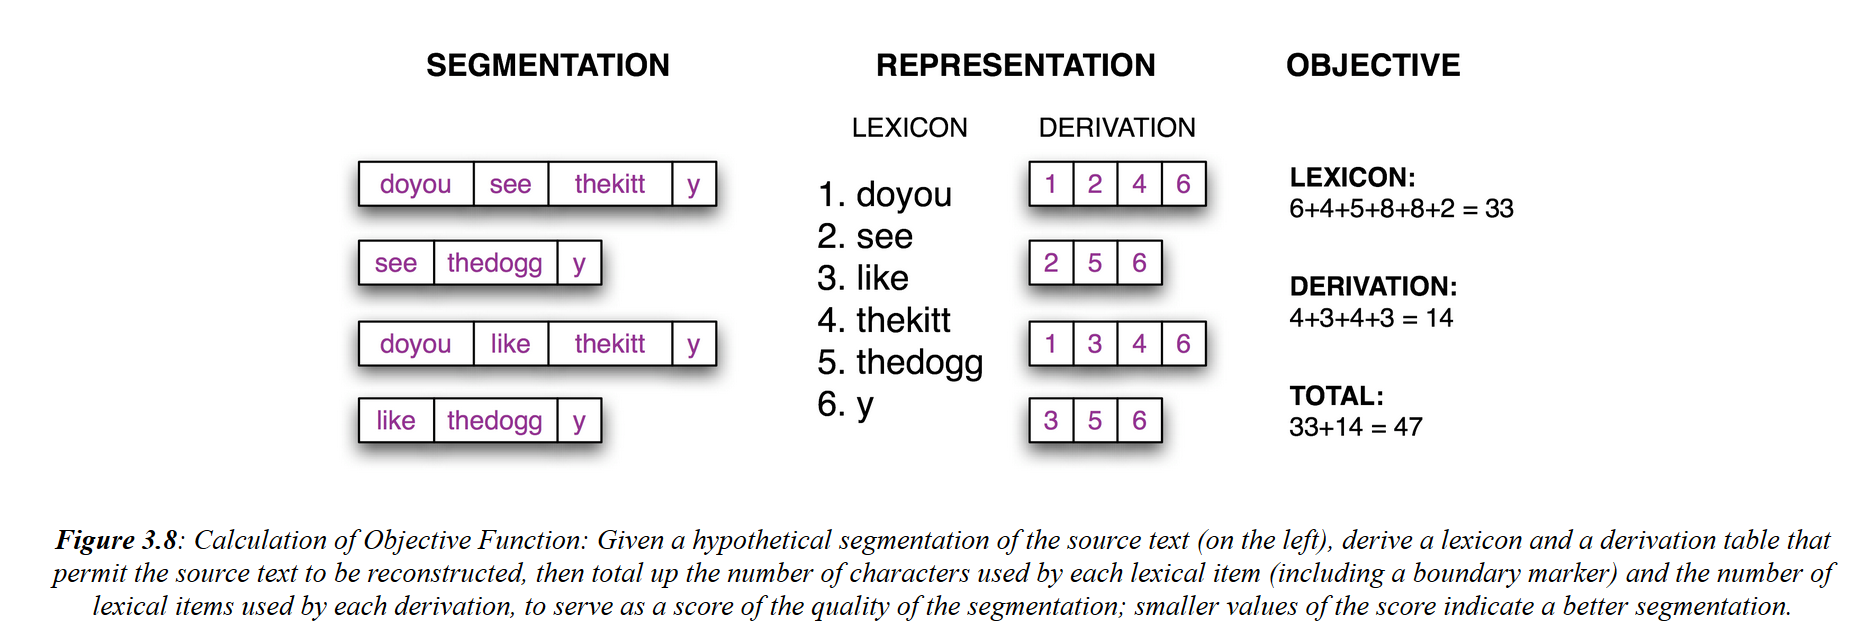

In [137]:
#implementation of objective function above
def evaluate(text, segs):
    words = segment(text, segs)
    text_size = len(words)
    lexicon_size = sum(len(word) + 1 for word in set(words))
    return text_size + lexicon_size

text = "doyouseethekittyseethedoggydoyoulikethekittylikethedoggy"
seg1 = "0000000000000001000000000010000000000000000100000000000"
seg2 = "0100100100100001001001000010100100010010000100010010000"
seg3 = "0000100100000011001000000110000100010000001100010000001"
print("Segmentation using seg3: ",segment(text, seg3))
print("Evaluation of seg3: ",evaluate(text, seg3))
print("Evaluation of seg2: ",evaluate(text, seg2))
print("Evaluation of seg1: ",evaluate(text, seg1)) #smaller is preferred.

Segmentation using seg3:  ['doyou', 'see', 'thekitt', 'y', 'see', 'thedogg', 'y', 'doyou', 'like', 'thekitt', 'y', 'like', 'thedogg', 'y']
Evaluation of seg3:  47
Evaluation of seg2:  48
Evaluation of seg1:  64


The final step is to search for the pattern of zeros and ones that minimizes this objective function, shown in 3.10. Notice that the best segmentation includes "words" like thekitty, since there's not enough evidence in the data to split this any further.

In [138]:
from random import randint

def flip(segs, pos):
    return segs[:pos] + str(1-int(segs[pos])) + segs[pos+1:]

def flip_n(segs, n):
    for i in range(n):
        segs = flip(segs, randint(0, len(segs)-1))
    return segs

def anneal(text, segs, iterations, cooling_rate):
    temperature = float(len(segs))
    while temperature > 0.5:
        best_segs, best = segs, evaluate(text, segs)
        for i in range(iterations):
            guess = flip_n(segs, round(temperature))
            score = evaluate(text, guess)
            if score < best:
                best, best_segs = score, guess
        score, segs = best, best_segs
        temperature = temperature / cooling_rate
        print(evaluate(text, segs), segment(text, segs))
    print()
    return segs

text = "doyouseethekittyseethedoggydoyoulikethekittylikethedoggy"
seg1 = "0000000000000001000000000010000000000000000100000000000"
print(anneal(text, seg1, 5000, 1.2))

64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
61 ['doyou', 'seethekit', 't', 'ysee', 'thedog', 'gy', 'doyou', 'like', 'thekitt', 'y', 'like', 'thedog', 'gy']
56 ['doyou', 'seethekit', 't', 'ysee', 'thedoggy', 'doyou', 'like', 'thekitty', 'like', 'thedoggy']
54 ['doyou', 'seethekit', 'tysee', 'thedoggy', 'doyou', 'like', 'thekitty', 'like', 'thedoggy']
54 ['doy

## Exercises

### Question 1

Write code to access a favorite webpage and extract some text from it. For example, access a weather site and extract the forecast top temperature for your town or city today.

In [139]:
# Try here
# Printing the first 10 headlines of hacker news
url = "https://news.ycombinator.com/"
html = request.urlopen(url).read().decode('utf8')
#print("html")
raw = BeautifulSoup(html, 'html.parser')

#print("raw")

headlines = [titleline.a.text for titleline in raw.find_all("span", class_="titleline")]
print("\n\n".join(headlines[:10]))

Discover the IndieWeb, one blog post at a time

FFmpeg School of Assembly Language

Show HN: I Built a Visual Workflow Automation Platform – FlowRipple

'The tyranny of apps': those without smartphones are unfairly penalised

Apple pulls data protection tool after UK government security row

These years in Common Lisp: 2023-2024 in review

French nuclear plant consumes more power than it generates in first two months

What Your Email Address Reveals About You: LLMs and Digital Footprints

Why Barcelona Bought the Building That Symbolizes Its Housing Crisis

When AI Thinks It Will Lose, It Sometimes Cheats, Study Finds


### Question 2

Read about the `re.sub()` function for string substitution using regular expressions, using `help(re.sub)`. Use `re.sub` in writing code to remove HTML tags from an HTML file, and to normalize whitespace. You can use the website you choose in the previous question.

In [140]:
# Try here
help(re.sub)
#print(html)
normalized = re.sub(r'\s+', " ", re.sub("<[^>]*>", "", html))
print(normalized)

Help on function sub in module re:

sub(pattern, repl, string, count=0, flags=0)
    Return the string obtained by replacing the leftmost
    non-overlapping occurrences of the pattern in string by the
    replacement repl.  repl can be either a string or a callable;
    if a string, backslash escapes in it are processed.  If it is
    a callable, it's passed the Match object and must return
    a replacement string to be used.

 Hacker News Hacker News new | past | comments | ask | show | jobs | submit login 1. Discover the IndieWeb, one blog post at a time (indieblog.page) 70 points by vinhnx 1 hour ago | hide | 18&nbsp;comments 2. FFmpeg School of Assembly Language (github.com/ffmpeg) 12 points by davikr 20 minutes ago | hide | discuss 3. Show HN: I Built a Visual Workflow Automation Platform – FlowRipple (flowripple.com) 51 points by shivsarthak34 2 hours ago | hide | 36&nbsp;comments 4. &#x27;The tyranny of apps&#x27;: those without smartphones are unfairly penalised (theguardian.

### Question 3

Use the Porter Stemmer to normalize some tokenized text, calling the stemmer on each word. Do the same thing with the Lancaster Stemmer and see if you observe any differences.

In [141]:
# You can use the text below as the source text
raw = """Well, this is the end, Sam Gamgee,' said a voice by his side. And there was Frodo, pale and worn, and yet himself again; and in his eyes there was peace now, neither strain of will, nor madness, nor any fear. His burden was taken away. There was the dear master of the sweet days in the Shire."""

tokens = word_tokenize(raw)


# Try here

porter = nltk.PorterStemmer()
porter_res = [porter.stem(t) for t in tokens]

lancaster = nltk.LancasterStemmer()
lancaster_res = [lancaster.stem(t) for t in tokens]

print(porter_res == lancaster_res)
print(porter_res)
print(lancaster_res)

# The results are different. The lancaster stemmer removes more suffix and prefix. But that is not always the case, lancaster keeps the words "his" and "was" while porter slices them down to "hi" and "wa"


False
['well', ',', 'thi', 'is', 'the', 'end', ',', 'sam', 'gamge', ',', "'", 'said', 'a', 'voic', 'by', 'hi', 'side', '.', 'and', 'there', 'wa', 'frodo', ',', 'pale', 'and', 'worn', ',', 'and', 'yet', 'himself', 'again', ';', 'and', 'in', 'hi', 'eye', 'there', 'wa', 'peac', 'now', ',', 'neither', 'strain', 'of', 'will', ',', 'nor', 'mad', ',', 'nor', 'ani', 'fear', '.', 'hi', 'burden', 'wa', 'taken', 'away', '.', 'there', 'wa', 'the', 'dear', 'master', 'of', 'the', 'sweet', 'day', 'in', 'the', 'shire', '.']
['wel', ',', 'thi', 'is', 'the', 'end', ',', 'sam', 'gamg', ',', "'", 'said', 'a', 'voic', 'by', 'his', 'sid', '.', 'and', 'ther', 'was', 'frodo', ',', 'pal', 'and', 'worn', ',', 'and', 'yet', 'himself', 'again', ';', 'and', 'in', 'his', 'ey', 'ther', 'was', 'peac', 'now', ',', 'neith', 'strain', 'of', 'wil', ',', 'nor', 'mad', ',', 'nor', 'any', 'fear', '.', 'his', 'burd', 'was', 'tak', 'away', '.', 'ther', 'was', 'the', 'dear', 'mast', 'of', 'the', 'sweet', 'day', 'in', 'the', 's

### Question 4

Define a variable `silly` to contain the string: 'newly formed bland ideas are inexpressible in an infuriating
way'. (This happens to be the legitimate interpretation that bilingual English-Spanish speakers can assign to Chomsky's famous nonsense phrase, colorless green ideas sleep furiously according to Wikipedia). Now write code to perform the following tasks:

   
1. Split silly into a list of strings, one per word, using Python's `split()` operation, and save this to a variable called `bland`.

2. Extract the second letter of each word in silly and join them into a string, to get `'eoldrnnnna'`.

3. Combine the words in bland back into a single string, using `join()`. Make sure the words in the resulting string are separated with whitespace.

4. Print the words of silly in alphabetical order, one per line.





In [142]:
# Try here
silly = "newly formed bland ideas are inexpressible in an infuriating way"
print("\n------- Splited Silly -------")
bland = silly.split()
print(bland)
print("\n------- Extraction of second character -------")
print("".join([c[1] for c in bland]))
print("\n------- Built bland back -------")
print(" ".join([w for w in bland]))
print("\n------- Sorted Silly -------")
print("\n".join(sorted(silly.split())))


------- Splited Silly -------
['newly', 'formed', 'bland', 'ideas', 'are', 'inexpressible', 'in', 'an', 'infuriating', 'way']

------- Extraction of second character -------
eoldrnnnna

------- Built bland back -------
newly formed bland ideas are inexpressible in an infuriating way

------- Sorted Silly -------
an
are
bland
formed
ideas
in
inexpressible
infuriating
newly
way
